# Projeto : Verificação do Motivo de Clientes Inadimplentes

## Descrição do problema.

   A partir de uma base de dados no formato CSV(Comma-separated values), irei explorar dados de créditos sobre clientes de uma instituição financeira. O foco será entender a causa da segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente(`default = 1`), ou seja o objetivo é entender o porque o cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos da base de dados, como salário, escolaridade e movimentação financeira.

____________________________________________________________________________________________________________________

*Abaixo uma descrição completa dos atributos:*

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



### Importação de bibliotecas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

__________________________________________________________________________________________________________________

### Geração da base de dados.

In [2]:
df = pd.read_csv('Python_M10_support material.csv', na_values='na')

In [3]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


________________________________________________________________________________________________________

# Exploração de dados.

###           Estrutura do conjunto de dados.

In [4]:
df.shape # Quantidade de linha, quantidade de colunas.

(10127, 16)

In [5]:
df[df['default'] == 0].shape # Apenas as linhas onde os clientes são Inadimplentes

(8500, 16)

In [6]:
df[df['default'] == 1].shape # Apenas as linhas onde os clientes são Adimplentes

(1627, 16)

In [7]:
qtd_total, _ = df.shape #Obtém apenas o números de linhas, o underline indica que não utilizaremos a coluna
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [8]:
print(f'A proporção clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A proporção clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporção clientes adimplentes é de 83.93%
A proporção clientes inadimplentes é de 16.07%


____________________________________________________________________________________________________

### Schema do conjunto de dados.

In [9]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [10]:
df.dtypes # Verificando o tipo do dado de cada coluna

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

#### - Atributos **categóricos**

In [11]:
df.select_dtypes('object').describe().transpose() # Possível notar que 'limite_credito' e 'valor_transacoes_12m' 
                                                  # estão com o tipo do dado errado, deveria ser float.

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


#### - Atributos **numéricos**

In [12]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### Dados faltantes.

In [13]:
df.head(n=5) # Pode se observar nessa pequena amostra, que o estado civil da linha 3, encontra-se NAN(Not a Number), ou seja
             # um dado faltante

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [14]:
df.isna().any() # Onde estiver True, significa que na coluna existem dados faltantes.

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

##### -> Função para verificar a porcentagem dos dados faltantes em relação a nossa base de dados

In [15]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    
    stats_dados_faltantes = [] #cria uma lista vazia
    for col in df.columns: # verifica coluna por coluna dentro do nosso data frame
        if df[col].isna().any(): # verifica se o dado em determinada coluna é True ou False, caso seja True, ele entra no IF
            qtd, _ = df[df[col].isna()].shape # vai pegar apenas as linhas e jogar na variavel 'qtd'
            total, _ = df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}} 
            stats_dados_faltantes.append(dict_dados_faltantes)
    for stat in stats_dados_faltantes:
        print(stat)
                                                                                                        

In [16]:
stats_dados_faltantes(df=df) # Relação entre as linhas com dados faltantes e a quantidade total de linhas do data frame

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [17]:
stats_dados_faltantes(df=df[df['default'] == 0]) # Relação dos dados faltantes e a quantidade de linhas com Adimplentes

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [18]:
stats_dados_faltantes(df=df[df['default'] == 1]) # Relação dos dados faltantes e a quantidade de linhas com Inadimplentes

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


_________________________________________________________________________________________________________


# Transformação e limpeza de dados(Data Wrangling)

#### Tarefas

* Corrigir o schema das nossas colunas (limite_credito e valor_transacoes_12m)
* Remover os dados faltantes

#### Correção do schema

In [19]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes # Verificando o tipo, que atualmente é 'object', mas deveria ser float

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [20]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5) # O Atual formato, antes de mudar o tipo, precisamos deixar no padrão
                                                         # americano, assim o Python reconhece

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Agora uma função *lambda* para limpar os dados. Vamos testar sua aplicação com uma base de dados enxuta e depois aplicamos nas colunas através do **map**

In [21]:
fn = lambda valor: float(valor.replace('.', '').replace(',','.')) # Antes de convertes para o tipo float, 
                                                                  # ele deixa no padrão americano 1111.22
valores_testes =['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_testes))

print(valores_testes)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Agora só precisa aplicar nas colunas que precisam de tratamente `limite_credito` e `valor_transacoes_12m`

In [22]:
df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

Visualizar as colunas para ver se elas realmentes foram alteradas.

In [23]:
df.dtypes # Podemos ver que as colunas foram alteradas para float com sucesso.

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Pode-se ver algumas informações quando utilizamos o método describe, como média, desvio padrão, valor mínimo, máximo, etc..

In [24]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### Remoção dos dados faltantes

Será utilizado uma função do pandas aplicada no próprio Data Frame

In [25]:
df.dropna(inplace=True) 

Analisando a estrutura de dados novamente:

In [26]:
df.shape # Podemos ver que o número de linhas foi reduzido em grande quantidade, de 10127 para 7081

(7081, 16)

In [27]:
df[df['default'] == 0].shape

(5968, 16)

In [28]:
df[df['default'] == 1].shape

(1113, 16)

In [29]:
qtd_total_novo, _ = df.shape 
qtd_novos_adimplentes, _ = df[df['default'] == 0].shape
qtd_novos_inadimplentes, _ = df[df['default'] == 1].shape

In [30]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_novos_adimplentes / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_novos_inadimplentes / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


____________________________________________________________________________________________________

# Visualização de dados.

Após os dados serem devidamente explorados e tratados, está na hora de criar diversas visualizações para correlacionar as variáveis explicativas com a variável reposta para buscar o entendimento, do porque, o que leva um cliente a inadimplencia. Será comparada três bases (Todos os clientes, Adimplentes, Inadimplentes).

Definindo um padrão para o Seaborn que é a biblioteca gráfica que iremos trabalhar.

In [31]:
sns.set_style('whitegrid')

In [32]:
df_adimplente = df[df['default'] == 0]

In [33]:
df_inadimplente = df[df['default'] == 1]

## Visualizações categóricas

Nessa parte será visualizada a relação entre a variável `default` com os atributos categóricos.

In [34]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


#### -> Escolaridade

<ipython-input-35-d1dda99d7e65>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


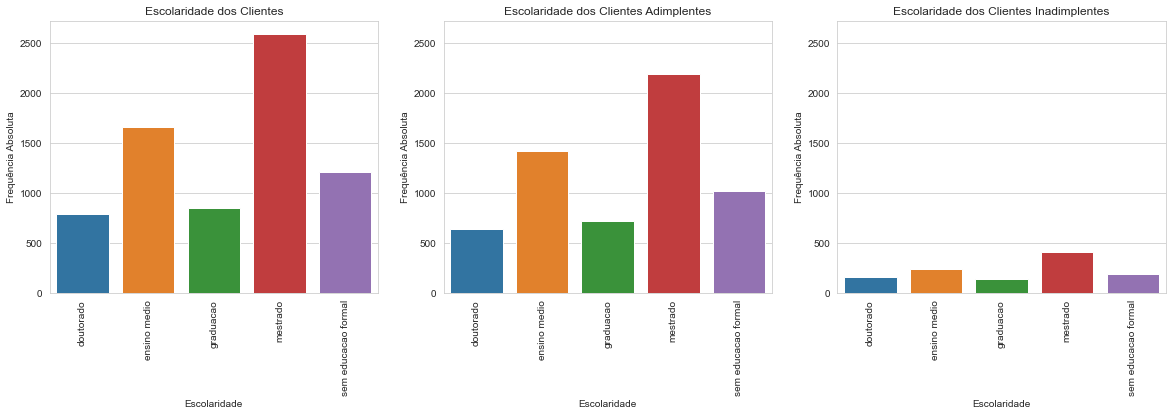

In [35]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

#### -> Salário Anual

<ipython-input-37-09986a8e1ec3>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


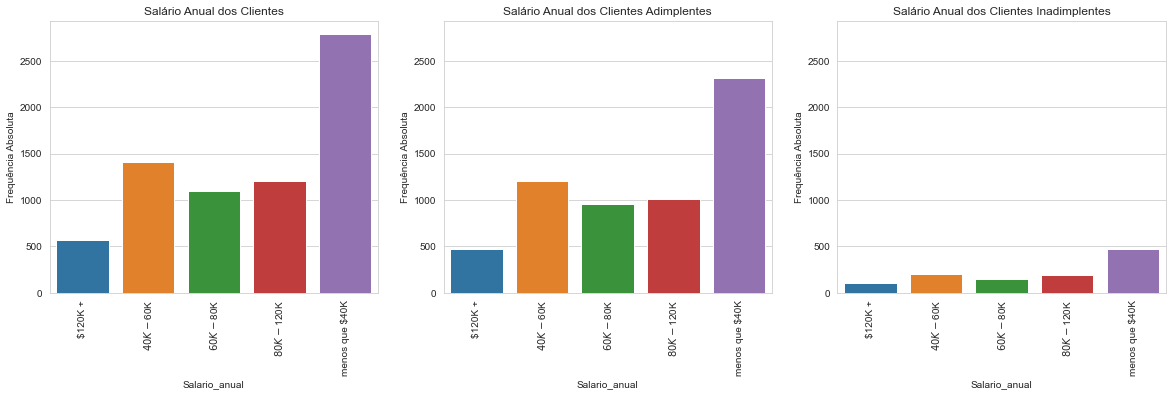

In [37]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

#### -> Tipo do Cartão

<ipython-input-38-901af39b0b83>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


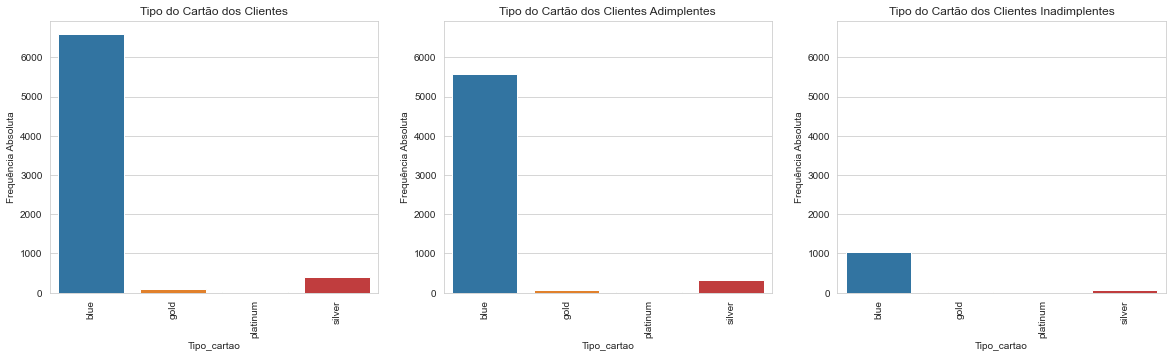

In [38]:
coluna = 'tipo_cartao'
titulos = ['Tipo do Cartão dos Clientes', 'Tipo do Cartão dos Clientes Adimplentes', 'Tipo do Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

## Visualizações numéricas

Nessa parte será visualizada a relação entre a variável `default` com os atributos numéricos.

In [40]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


#### -> Quantidade de transções nos Últimos 12 meses

<ipython-input-41-25f8dadef5d7>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


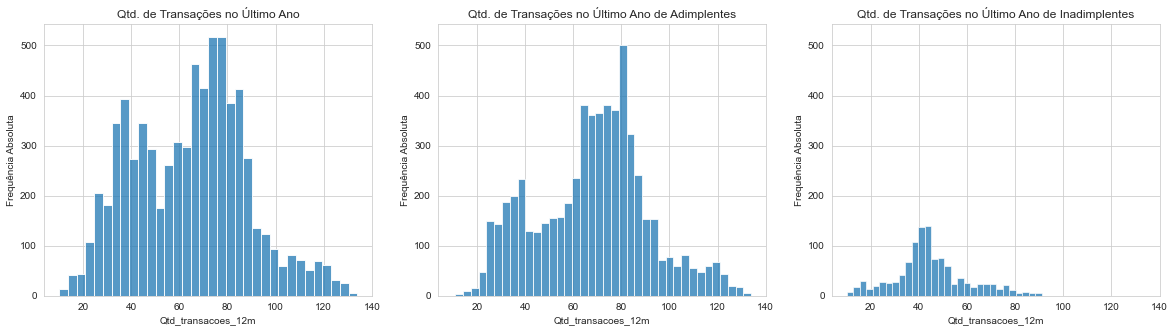

In [41]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

#### -> Valor das Transções nos Últimos 12 meses

<ipython-input-43-d2227f51104b>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


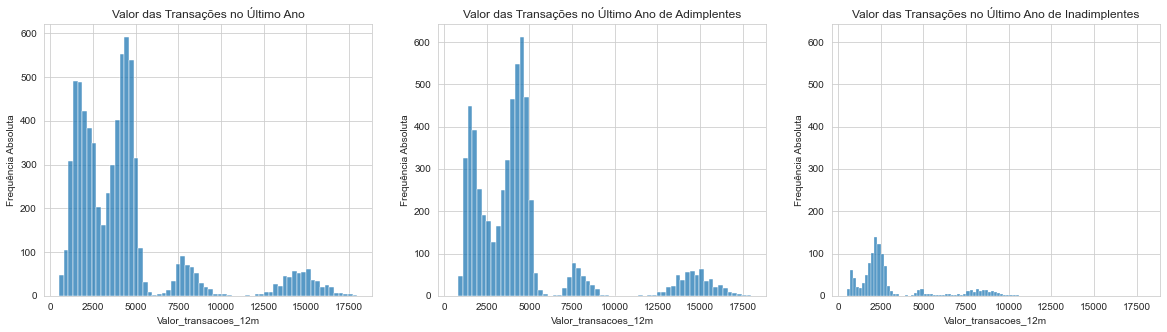

In [43]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

#### -> Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

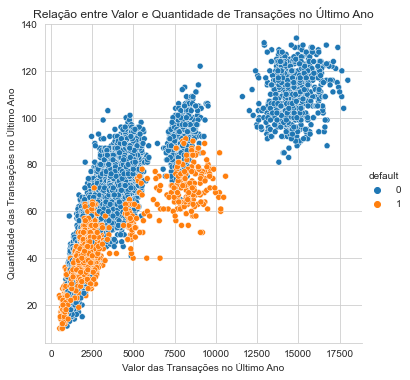

In [44]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

# Insights

### Observação

-> Na seção de Limpeza de dados, excluímos 3046 linhas da nossa base dados. Só foram removidas, com a certeza que não atrapalharia nas análises que foram feitas. A porcentagem das linhas faltantes ,em relação as três bases de dados(Clientes, Clientes Adimplentes, Clientes Inadimplentes), tiveram números muito semelhantes, como foi mostrado.

### Insight - Atributos Categóricos

-> A comparação da variável reposta `default` com **escolaridade**, **Salário Anual** e **Tipo do Cartão**, tiveram o mesmo resultado entre as três bases de dados comparadas, chegando a conclusão que a inadimplencia dos clientes não tem uma relação direta com os atributos analisados.

### Insight - Atributos Numéricos

-> O atributo **Quantidade de Transações nos Últimos 12 meses**, já revela que existem faixas onde clientes inadimplentes aparecem, no caso, os clientes inadimplentes ocupam uma faixa no valor de 40 trasanções. Fica claro quando comparamos o primeiro gráfico(Clientes) com o segundo(Clientes Adimplentes) esse buraco no segundo gráfico, são os clientes inadimplentes.

-> O atributo **Valor de Transações nos Últimos 12 Meses**, evidencia mais diferenças entres os gráficos, utilizando a mesma leitura do insight acima, é possível notar um buraco no gráfico de todos os clientes, em relação aos adimplentes. A faixa ocupado pelos inadimplentes fica no em torno de 2500.

-> Orientado pelos insights acima, a junção das duas colunas em um gráfico, mostram com mais clareza onde existe a maior porcentagem de clientes inadimplentes, representados pela cor laranja, eles se agrupam em dois momentos. No valor de transações em 2500/3500 e com 10 a 60 transações feitas. o segundo momento começa com 60 a 80 transações com um valor de 7500 a 10000.

-> É possível notar pelo último gráfico, que existe um grupo só de clientes adimplentes com um número maior na quantidade de transações e no valor das transações. 

### Conclusão

-> Os clientes com maior atividade e poder financeiro nas transações não apresentam chances de não honrar com suas dívidas, assim não sendo necessário uma abordagem diferente com essses clientes. Já os que transionam pouco e tem um baixo valor de transções, precisam de uma nova abordagem, um cuidado especial, para que no futuro eles não apresentem problemas relação aos créditos fornecidos, assim diminuindo o número de clientes inadimplentes.